# Project 3: Unsupervised Learning
###  Creating Customer Segments
<sub>Uirá Caiado. May 9, 2016<sub>

#### Abstract

_As pointed out by \cite{Udacity}, today many companies collect vast amounts of data on their clientele and have a strong desire to understand the meaningful relationships hidden in their customer base. In this project, I will apply unsupervised learning techniques on product spending data collected for consumers of a wholesale distributor in Lisbon, Portugal. My goal is to define how best segment their customers into distinct categories. Afterwards, the segmentation found will be compared with an additional labeling. Lastly, I will suggest ways that the segmentation could assist the wholesale distributor with future service changes._

## 1. Introduction

In this section, I will give some background about the problem addressed and the goal of the project.

```
Udacity:

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.
```


### 1.1. Some Background

As suggested by this [article](http://www.nytimes.com/2014/08/18/technology/for-big-data-scientists-hurdle-to-insights-is-janitor-work.html?_r=0), the current abundance of digital data from many sources — the web, sensors, smartphones and corporate databases — can be mined for discoveries and insights and might lead to smarter, data-driven decision-making in every field.

In this project, I will analyze a dataset containing data on various customers' annual spending amounts of diverse product categories looking for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

Given that there is no previous labeling of each instance in the dataset, I will use unsupervised learning to look for such structure. As explained by \cite{Mitchell}, in this case, there is a set of $N$ observations $(x_1,x_2, ..., x_N )$ of a random vector $X$ that has a joint density $Pr(X)$. The goal is to directly infer the properties of this probability density without the help of a supervisor or teacher providing correct answers or degree-of-error for each observation.


### 1.2. Getting Started

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers. So, let's start loading the dataset.

```
Udacity:

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.
```

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## 2. Data Exploration

In this section, I will begin exploring the data to understand how each feature is related to each others. 

### 2.1. Basic Statistics

The six labels explored are continuous and are related to the annual spending on diverse product categories. They are all expressed in in monetary units. The features are:
- FRESH: fresh products 
- MILK: milk products
- GROCERY: grocery products 
- FROZEN: frozen products
- DETERGENTS_PAPER: detergents and paper products
- DELICATESSEN: delicatessen products

In the table below can be observed a statistical description of the dataset:

```
Udacity:

In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.
```

In [4]:
# Display a description of the dataset
df_stats = data.describe()
df_stats

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### 2.2. Selecting Samples

To get a better understanding of the customers and how their data will transform through the analysis, in the Table below I selected a few sample data points and plotted a boxplot comparing them with the distribution of each feature.

```
Udacity:

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.
```

In [7]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [1, 271, 413]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
samples.index = indices
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
1,7057,9810,9568,1762,3293,1776
271,2083,5007,1563,1120,147,1550
413,4983,4859,6633,17866,912,2435


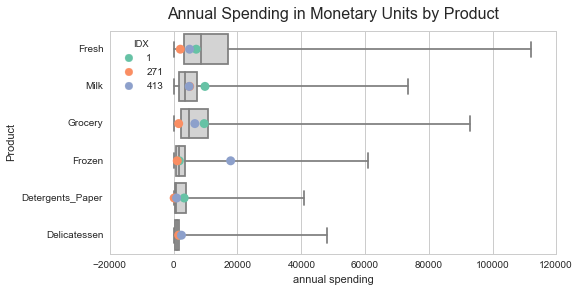

In [13]:
import eda; reload(eda);
eda.features_boxplot(data, samples, indices);


```
Udacity:

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** 
```

Usually data expressed in money, as wealth, expenses, income and so on, are very [skewed](https://en.wikipedia.org/wiki/Skewness). As can be seen above, this dataset is not different. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution. There are some customers who spend much more than the median, while the most of them spend around the same level (the data inside the box comprehend 50% of the dataset). 

The data point 271 spent less than 75% of the other customers (lower quartile) in three product categories: Fresh, Groceries and detergent papers. On the another hand, it spent above the median in products relates to Milk. It could be a small coffee shop, for example. The customer $1$ could be a hotel, as it spent above or expressively above the mean in all product categories, except by Fresh. The last customer selected, 413, has spent at the fourth quartile of the distributions in two products: Frozen, that is well above the third quartile, and delicatessen. It could be a small grocery store.

### 2.3. Feature Relevance

One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one group of goods will necessarily buy some proportional amount of another category of products? We can make this determination by training a supervised regression learner on a subset of the data with one feature removed and then score how well that model can predict the removed feature.

The table below shows the $R^{2}$ when attempting to predict different features. The regressions were performed using a [Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). I divided the data between a test and a training set, and then toke out one of the features at each iteration to be predicted by all others. Then, I measured how well those features were relevant to replicate the hold-out column using the coefficient of determination, the $R^{2}$. This coefficient is scored between 0 and 1, with 1 being a perfect fit. A negative $R^2$ implies the model fails to fit the data.

```
Udacity:

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.
 ```


In [10]:
# import libraries needed
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# define help functions
def shuffle_split_data(X, y):
    """ 
    Shuffles and splits data into 75% training and 25% testing subsets,
    then returns the training and testing subsets.
    :param X: numpy array. Features
    :param y: numpy array. Labels
    """
    # Shuffle and split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                        random_state=0)
    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test

l_score = []
for s_col in data.columns:
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the
    # given feature
    new_data = data.copy()
    y = new_data[s_col]
    X = new_data.drop([s_col], axis=1)

    # TODO: Split the data into training and testing sets using the given feature
    # as the target
    X_train ,y_train, X_test, y_test = shuffle_split_data(X, y)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = r2_score(regressor.predict(X_test), y_test)
    l_score.append(score)
    
df_r2 = pd.DataFrame(l_score, index = data.columns, columns=["Score"])
df_r2.index.names = ["PREDICTED"]
df_r2

,Score
PREDICTED,
Fresh,-0.768741
Milk,0.054998
Grocery,0.743437
Frozen,-1.412487
Detergents_Paper,0.557251
Delicatessen,0.163481


```
Udacity:

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data

**Answer:**
```

As can be seen in the table above, two features, `Grocery` and `Detergents_Paper`, presented a high $R^2$ score. Around $75$% and $55$% of the sample variation in each of the columns used as labels were explained by the other features, respectively. Looking at just this score, I would say that at least the `Grocery` might be unnecessary for identifying customers' spending habits. A good deal of the information on the variability of this feature is contained in others. On the other hand, `Fresh` and `Frozen` presented negative $R^2$, what suggests that the information from them could not be retrieved using other features. In spite of those finds, it is important to point out that [low R-squared values](http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit) are not inherently bad. This score should always be analyzed in conjunction with other measurements. So, in the next session, I will inspect those relationships visually.

### 2.4. Visualize Feature Distributions

To get a better understanding of the dataset, in the figure below I am going to plot a scatter matrix of each of the six product features present in the data.

```
Udacity:

To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.
```

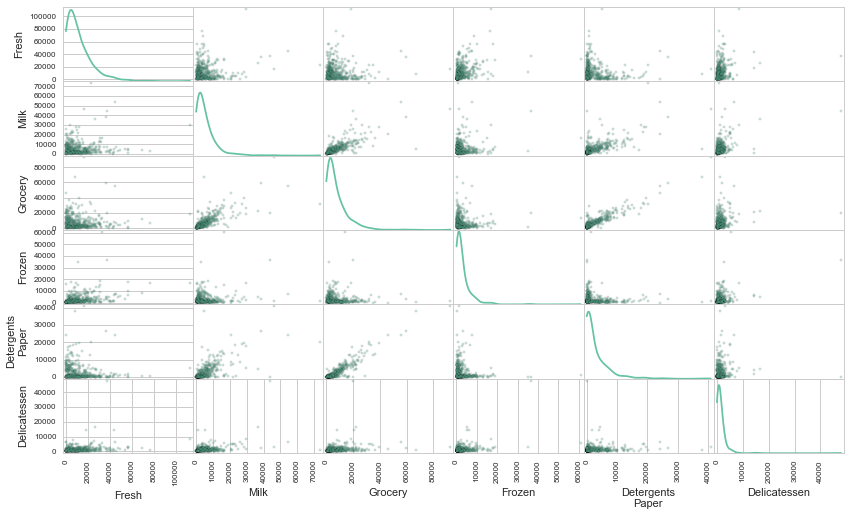

In [11]:
# change the columns labels just for visual aesthetic
data2 = data.copy()
data2.columns = [x.replace("_", "\n") for x in data.columns]
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data2, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

```
Udacity Reviewer:

Required: Make sure to describe the distribution of the features themselves (see plots on the diagonal of visualization).

    * Does the data appear normally distributed?
    * Is there any skewness?

Suggestion: You could also look at the correlations more closely with data.corr()...

```

In the [main diagonal](http://www.mathwords.com/m/main_diagonal.htm) is plotted the distribution of each feature. As suggested in section 2.2, they are very skewed to the left, apparently showing a [Log Normal Distribution](http://mathworld.wolfram.com/LogNormalDistribution.html). As the most of the data points are lying in the bottom corner of the charts, it is a little cumbersome to judge the relationships. Below, I am going to look at the correlation matrix of the features using a heat map.

```
Udacity:

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie?
**Answer:**
```

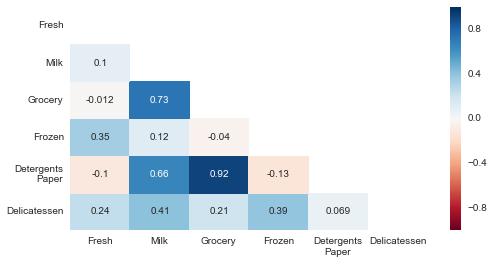

In [12]:
corr = data2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, mask=mask, annot=True, cmap='RdBu')
ax.figure.set_size_inches([8.,4.])

The scatter plot between `Grocery` and `Detergents_Paper` presented a curious linear relationship. It might suggest that they are [complements](http://www.investopedia.com/terms/c/complement.asp) to each other. That is, they are consumed in conjunction with other, or they can be complements to a third variable. For example, the `Milk` category seems to be slightly correlated with those features. The strength of this relationship can be confirmed by the correlation between the two features ($0.92$).

The `Fresh` and `Frozen` categories are slightly ($0.35$) correlated with each other, as the pairs `Delicatessen` and  `Frozen`($0.39$) and `Delicatessen` and `Milk` ($0.41$). In the next section, I will deal with apparently log distribution of the dataset.

## 3. Data Preprocessing
In this section, I will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and possibly removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### 3.1. Feature Scaling

If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm, taht I will use below

```
Udacity:

### Implementation: Feature Scaling
In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.
 ```

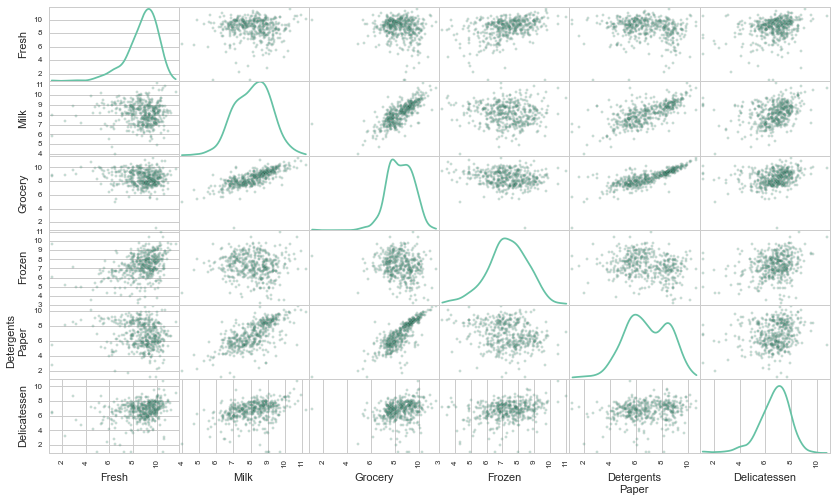

In [14]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data.copy())
log_data2 = np.log(data2.copy())

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples.copy())

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data2, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

After applying a natural logarithm scaling to the data, the distribution of each feature appears much more normal. Now it is clear that there is a stronger relationship between the pairs of features  `Grocery` and `Milk` and `Grocery` and `Detergents and Paper`. `Milk` and `Detergents and Paper` are somewhat weaker but still presented a substantial correlation.

Below can be seem how the sample data has changed after having the natural logarithm applied to it.

```

Udacity:

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.
```

In [34]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
271,7.641564,8.518592,7.354362,7.021084,4.990433,7.346010
413,8.513787,8.488588,8.799812,9.790655,6.815640,7.797702


Looking at the numbers transformed like that, without any reference,  is a little difficult to interpret. In the next subsection, I will visualize the data in a boxplot.

### 3.2. Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, I will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal. The following summary shows the number of outliers by feature and the data points that were considered abnormal for more than one feature.


```
Udacity:
### Implementation: Outlier Detection
In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.
```

In [15]:
# For each feature find the data points with extreme high or low values
d_unique_idx = dict()
print "Number of Data points considered outliers for the feature\n"
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    df_out_lier = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    i_nfeatures = df_out_lier.shape[0]
    print "{:18s}\t{:18s}".format(feature, str(i_nfeatures))
    for x in df_out_lier.index:
        if x not in d_unique_idx.keys():
            d_unique_idx[x] = 1
        else:
            d_unique_idx[x] += 1

print "-------------------------"
print "TOTAL: Outliers: {} | Unique Outliers: {}".format(sum(d_unique_idx.values()),
                                                         len(d_unique_idx.keys()))
# filtering just the repeated outliers
print "\n\nData points considered outliers for more than one feature:"
df_aux = log_data.loc[[x[0] for x in d_unique_idx.iteritems() if x[1]>1]]
df_aux['count'] = None
df_aux['count'] = [d_unique_idx[x] for x in df_aux.index]
df_aux

Number of Data points considered outliers for the feature

Fresh             	16                
Milk              	4                 
Grocery           	2                 
Frozen            	10                
Detergents_Paper  	2                 
Delicatessen      	14                
-------------------------
TOTAL: Outliers: 48 | Unique Outliers: 42


Data points considered outliers for more than one feature:


PREDICTED,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,count
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612,2
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442,3
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523,2
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837,2
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437,2


```
Udacity:

### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 
**Answer:**
```

There are 48 outliers in the dataset and 42 are unique. 5 data points were considered outliers for more than one feature. One of the them was abnormal to three features, as can be seen in the `count` column in the table above. To decide which data point should be removed, I am going to plot a boxplot showing where these 5 data points are located considering the dataset without all the 42 outliers.

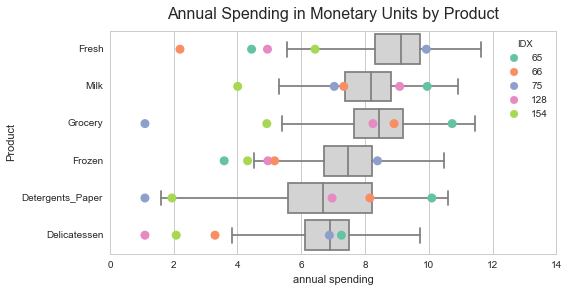

In [16]:
import eda; reload(eda);
log_data2 = log_data.loc[[x for x in log_data.index if x not in d_unique_idx.keys()]]
samples2 = log_data.loc[[x[0] for x in d_unique_idx.iteritems() if x[1]>1]]
ax = eda.features_boxplot(log_data2, samples2, samples2.index);

I am going to exclude the client IDs 75, 66, 128 and 154 from the dataset. As can be seen in the figure above, the 75 is far away from the lower whiskers of the `Grocery` category distribution. It is the same to the ID 128 data point in the `Delicatessen` category and to the ID 66 in `Fresh`. Lastly, I will exclude the 154 because was considered outlier for 3 groups. Despite that the ID 66 was found to be abnormal for two categories, I will not exclude it because it was not so far away from the lower whisker of the categories that it was considered an outlier.

In [17]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [154, 128, 75, 66]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

## Feature Transformation

In this section I will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### 4.1. PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, I will apply PCA to the new dataset to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

```
Udacity:

### Implementation: PCA
Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.
 ```

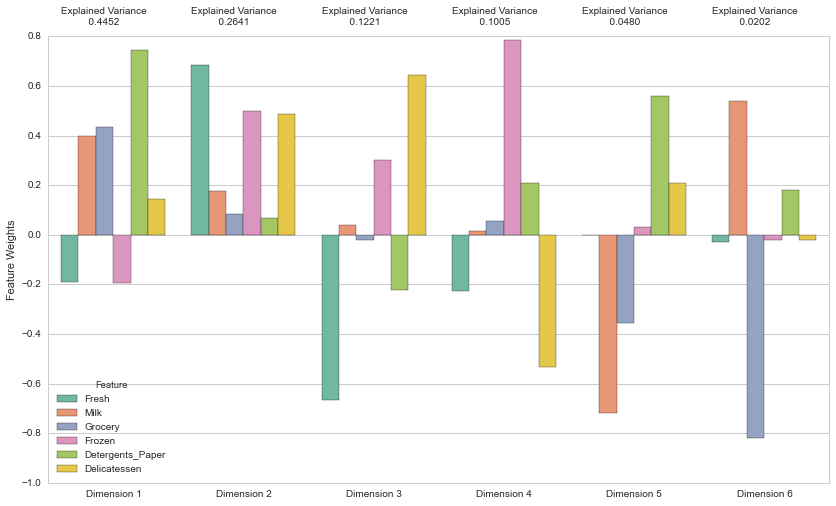

In [18]:
# TODO: Apply PCA to the good data with the same number of dimensions as features
from sklearn import decomposition
pca = decomposition.PCA(n_components=good_data.shape[1])
pca.fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = eda.pca_results(good_data, pca)

```
Udacity:

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.
**Answer:**
```

As shown in the Figure above, together the 6 components explain 100% of variance in the dataset. [Combining](https://discussions.udacity.com/t/understanding-the-direction-of-the-eigenvector-of-a-pca-component/164021/5) all PCs would form a coordinate system where we could graph each point from the original data. More than 70% of the variance was explained by the first two principal components. The first four explained more than 93% of the variance.

The principal components of a dataset can be understood as new compound features, where each PC is a weighted linear combination of the original features. In the first component, for instance, `Detergent_Paper` had a strong positive effect on the PC value, followed by `Grocery` and `Milk`. `Delicatessen` also increased the PC value, but isn't very expressive. `Fresh` and `Frozen` slightly decreased the PC value. Curiously, in the second component, the primary features were `Fresh`, `Frozen` and `Delicatessen`. The other features slightly increased the PC value.

It means that if a customer buys more `Detergent_Paper` items, it follows that there is a larger increase in the feature `Dimension 1` and a smaller increase in the `Dimension 2`. Also, if this same customer buys more `Fresh` items, it would just cause a lower decrease in the `PC1`,but would result in a larger increase in `PC2`. As the first two PCs represent almost 70% of the variance, we would have a decent grasp where this customer lies in the original feature space looking just at this two features.

In the third dimension of this new feature space (the principal components), `Fresh` presented an enormous negative effect on the PC value, while `Delicatessen` strongly increased the value. `Frozen` strongly increased the fourth dimension, while `Delicatessen` had the opposite effect.

The table below shows how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions.

```
Udacity:

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.
```

In [39]:
# Display sample log-data after having a PCA transformation applied
df_display = pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values)
df_display.index = log_samples.index
display(df_display)

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
1,1.7537,0.8680,0.2256,0.0077,-0.1177,0.2111
271,-1.3268,-0.7392,1.5119,-0.7648,-0.7701,0.8154
413,0.0157,1.6981,1.6267,1.4426,-0.0606,-0.1465


### 4.2. Dimensionality Reduction

When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

```
Udacity:

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.
 ```

In [19]:
# TODO: Fit PCA to the good data using only two dimensions
pca = decomposition.PCA(n_components=2)
pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

The table below shows how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

```
Udacity:

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.
```

In [41]:
# Display sample log-data after applying PCA transformation in two dimensions
df_display = pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2'])
df_display.index = log_samples.index
display(df_display)

,Dimension 1,Dimension 2
1,1.7537,0.8680
271,-1.3268,-0.7392
413,0.0157,1.6981


```
Udacity Reviewer:
    
If we look at the scatter matrix after reducing to 2 dimensions, we can see that the humps in Dimension 1 seem to indicate the presence of two distinct groups within the distribution...
```

bla

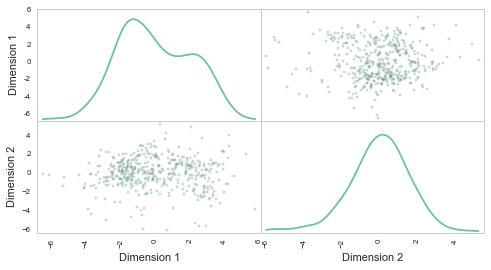

In [32]:
# Produce a scatter matrix for pca reduced data
l_ax = pd.scatter_matrix(reduced_data, alpha = 0.3, figsize = (8,4), diagonal = 'kde');
# remove grids from the charts
for l_ax1 in l_ax:
    for ax in l_ax1:
        ax.yaxis.grid()
        ax.xaxis.grid()

## 5. Clustering

In this section, I will introduce the EM algorithm and use it to explain the difference between the K-Means and Gaussian Mixture Model (GMM) clustering algorithm. I will use them to identify the various customer segments hidden in the data. Then, I will choose one to recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### 5.1. Comparing GMM to K-means algorithm

```
Udacity: 

### Question 6
What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?
**Answer:**
```

The GMM uses the Estimation-Maximization (EM) algorithm for fitting mixture-of-Gaussian models, using a Gaussian distribution in the Estimation step with covariance matrix between the different clusters. The [KMeans](http://scikit-learn.org/stable/modules/clustering.html#k-means) is equivalent to the EM algorithm when the covariance matrix between the clusters is small, all equal and diagonal.

That said, I am going to explain the Estimation-Maximization algorithm to show where the main difference between GMM and K-mean algorithm comes from. The [EM](http://rstudio-pubs-static.s3.amazonaws.com/1001_3177e85f5e4840be840c84452780db52.html) algorithm (\cite{Mitchell}) is a widely used approach to learning in the presence of unobserved variables.

So, let $X = \{x_1, ..., x_m\}$ denote a set of observed data in a set of $m$ independently drawn instances and $Z = \{z_1, ..., z_m\}$ unobserved data (latent variables) in these same instances. Let $Y = X \cup Z$ be a [random variable](https://www.mathsisfun.com/data/random-variables.html) representing the full data. $h$ is the hypothesized values to the parameters $\theta$, that governs the probability distribution from $Y$. In GMM algorithm, it represents the $\mu$ and $\sigma$ of the Gaussian Distribution. ${h}'$ is the revised parameters.

The EM algorithm searches for the maximum likelihood hypothesis ${h}'$ by seeking the parameters that maximize $E[\ln \, P(Y |{h}')]$. As it is an expectation, it is averaging over the possible values of the latent variables $Z$, weighting each $z$ according to its probability. Thus, the following steps are repeated until convergence:

**step 1:** Estimation(E) step: Calculate $Q({h}'|h)$ using current hypothesis $h$ and the observed data $X$ to estimate the probability distribution over $Y$.

$$Q({h}'|h) \leftarrow E[\ln P(Y | {h}')| h, \, X] $$

**step 2:** Maximization (M) step: Replace hypothesis h by the hypothesis ${h}′$ that maximizes this $Q$ function.

$$h \leftarrow \underset{{h}'}{\arg \max} \, Q({h}'|h)$$

Where $\ln P(Y | {h}') = ln \prod p(y_i| {h}') = \sum ln\, p(y_i| {h}')$. As stated before, the hypothesis ${h}′$ represents the values to the parameters $\theta$ of the distribution of each cluster in the data set (we need to provide the number of clusters beforehand). So, we are summing up the log-probability of each particular instance be part of one of these clusters. As the clusters in GMM might covariate in a meaningful way and in K-means not, **the main difference between both is that an instance can be "shared" by more than one group at a time in GMM (due to the covariance matrix). It uses a probabilistic approach to classify the data. On the other hand, the K-means performs a kind of "hard" assignment, attributing each instance to a particular cluster.**

Thus, one advantage of the K-means over GMM is the simplicity -  [It](http://scikit-learn.org/stable/modules/clustering.html#k-means) basically minimizes the sum of Euclidean distances between each point, while the other needs to estimate the $\mu$, $\sigma$ of each cluster. It leads the K-means to be a relatively faster algorithm and probably will work better when the data is clearly separable. In the next subsection, I will test both algorithms to choose between them.

### 5.2. Creating Clusters

Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). In the figure below, I am going to calculate the *mean* silhouette coefficient to K-Means and GMM using different number of clusters. Also, I will test different covariance structures to GMM.


```
Udacity: 

### Implementation: Creating Clusters
In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.
```

In [42]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
import time


range_n_clusters = [2, 3, 4, 5, 6, 8, 10]

f_st = time.time()
d_score = {}
d_model = {}
s_key = "Kmeans"
d_score[s_key] = {}
d_model[s_key] = {}
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    preds = clusterer.fit_predict(reduced_data)
    d_model[s_key][n_clusters] = clusterer
    d_score[s_key][n_clusters] = metrics.silhouette_score(reduced_data, preds)
print "K-Means took {:0.2f} seconds to run over all complexity space".format(time.time() - f_st)

f_avg = 0

for covar_type in ['spherical', 'diag', 'tied', 'full']:
    f_st = time.time()
    s_key = "GMM_{}".format(covar_type)
    d_score[s_key] = {}
    d_model[s_key] = {}
    for n_clusters in range_n_clusters:
        
        # TODO: Apply your clustering algorithm of choice to the reduced data 
        clusterer = GMM(n_components=n_clusters,
                        covariance_type=covar_type,
                        random_state=10)
        clusterer.fit(reduced_data)
        preds = clusterer.predict(reduced_data)
        d_model[s_key][n_clusters] = clusterer
        d_score[s_key][n_clusters] = metrics.silhouette_score(reduced_data, preds)
        f_avg += time.time() - f_st
        
print "GMM took {:0.2f} seconds on average to run over all complexity space".format(f_avg / 4.)


K-Means took 1.07 seconds to run over all complexity space
GMM took 3.88 seconds on average to run over all complexity space


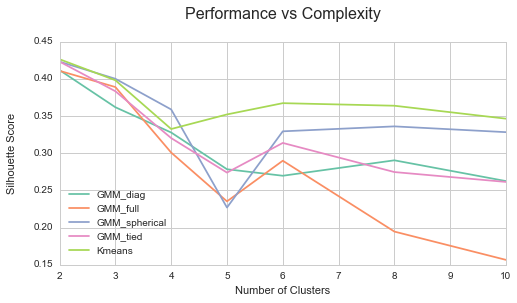

In [43]:
import pandas as pd
ax = pd.DataFrame(d_score).plot()
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Silhouette Score\n")
ax.set_title("Performance vs Complexity\n", fontsize = 16);

In [44]:
df = pd.DataFrame(d_score)
df.index.name = "Clusters"
df

,GMM_diag,GMM_full,GMM_spherical,GMM_tied,Kmeans
Clusters,,,,,
2,0.411629,0.410722,0.422988,0.423095,0.426297
3,0.361776,0.388915,0.400039,0.383261,0.398013
4,0.327802,0.300845,0.358788,0.320299,0.332522
5,0.278441,0.235268,0.226959,0.273933,0.352106
6,0.269692,0.289899,0.329408,0.313793,0.367256
8,0.290437,0.194652,0.336048,0.274649,0.363809
10,0.262524,0.156622,0.328277,0.261379,0.346406


```
Udacity:

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 
**Answer:**
```

As can be seen in Table above, the best K-means silhouette coefficient (around $0.4263$) occurred when it was set with two clusters. This setting outperformed all the GMM methods configurations tested. I am going to use this clustering algorithm in the Figure below to split the dataset into two groups. I will also plot the sample and the centroids, denoted by numbers.

In [46]:
# get centers
sample_preds = d_model["Kmeans"][2].predict(pca_samples)
centers = d_model["Kmeans"][2].cluster_centers_
preds = d_model["Kmeans"][2].fit_predict(reduced_data)


```
Udacity:

### Implementation: Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 
```

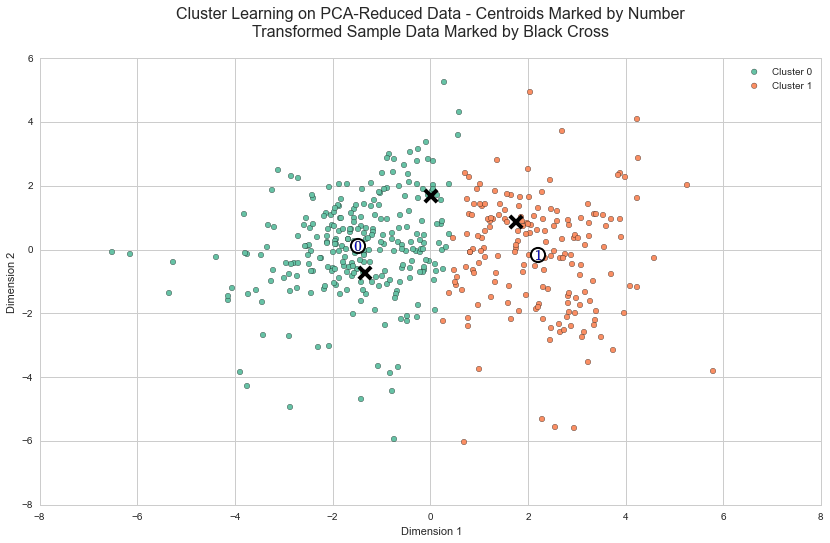

In [47]:
# Display the results of the clustering from implementation
eda.cluster_results(reduced_data, preds, centers, pca_samples)

### 5.3. Data Recovery

Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

```
Udacity:

Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.
```

In [48]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

PREDICTED,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9041,1924,2508,2116,301,689
Segment 1,3754,7970,12296,904,4666,1027


```
Udacity:

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.
**Answer:**
```


The *average customer* of Segment 0 has consumed more than 50% of the data set on Fresh, Grocery, and Frozen Categories. On the other hand, he has consumed less than 50% in the other categories. On Detergents and Paper, he has spent around 25%. This cluster could includes costumers like restaurants, for instance. The *average customer* of Segment 1 has consumed well above 75% on Milk and Grocery and has spent around 25% of the dataset on Frozen category. It could include costumers like coffee shops and grocery stores.

```
Udacity:

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.
**Answer:**
```

In [49]:
# Display the predictions
for i, pred in zip(log_samples.index, sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 1 predicted to be in Cluster 1
Sample point 271 predicted to be in Cluster 0
Sample point 413 predicted to be in Cluster 0


Looking at the predictions for each sample point, the segmentation performed is not entirely consistent with what I have thought. When I analyzed the Figure 1, I have mentioned that the sample points $1$ could be a hotel, the sample point $271$ might be a coffee shop and the $413$, a small grocery store. So, if I follow up my previous interpretations, these data point should be assign to the clusters $\{ 0, 1, 1\}$, but it turned out being assign to the segments $\{ 1, 0, 0\}$. The side of the data points is correct, but my previous statements might be inaccurate.

```
Udacity Reviewer:

Don't forget to quickly mention how the category spending of the sample points seem to align (or not align) with their predicted clusters' category spending.

For example, something like...

For Sample 0, the values for 'Grocery', 'Milk', and 'Detergents_Paper' are high and match the Cluster 0 center in those categories. 'Delicatessen' is near average for both sample and cluster center, and 'Frozen' is below average.
```

bla

## 6. Conclusion

```
Udacity:

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?
**Answer:**
```

As stated in Section 1, the goal here is to describe the variation in the different types of customers. The companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services, where two versions (A and B) are compared, which are identical except for one variation that might affect a user's behavior.

The analysis suggested that there are two customers groups in the dataset. So, if the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, he could take two samples from each group and run an A/B test to see how each segment would respond to the change in the delivery time. The Segment 0 that spends heavily in Fresh and Grocery might react differently to the delivery strategy than the Segment 1, for example. Thus, the segmentation would help the wholesale distributor choosing between delivery strategies based on the purchases behavior of a particular customer.

```
Udacity:

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?
**Answer:**
```

The clusters found also could be used as new features in the dataset. As some features may be affected by the customer segment, the groups could be used as dummy variables in a supervised learning task, for example. So, if the wholesale distributor wanted to predict the sales in another product category, the segmentation found would be used as one of the features to train the model and could improve the performance of the algorithm.

Finally, at the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. Below I am going to reintroduce the `'Channel'` feature to the dataset. An interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

```
Udacity

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.
```

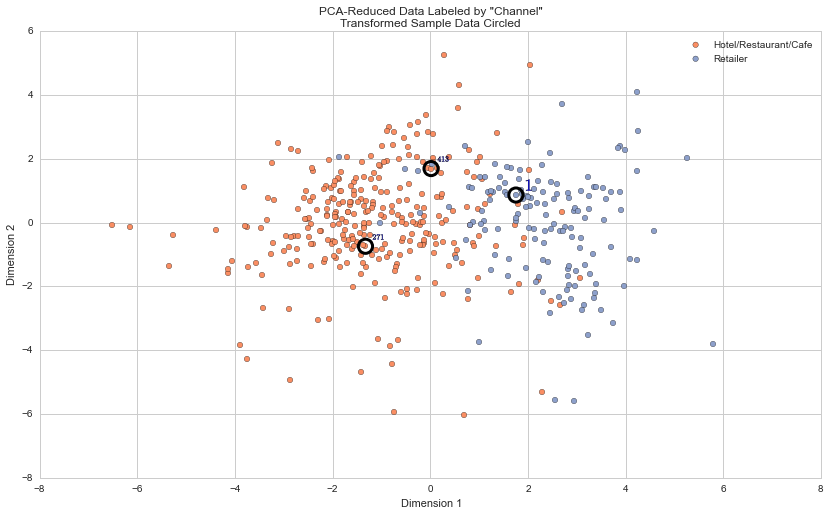

In [64]:
# Display the clustering results based on 'Channel' data
eda.channel_results(reduced_data, outliers, pca_samples, log_samples.index)

```
Udacity:

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*
**Answer:**
```

The K-means successfully identified the number of the main categories in the dataset. Although the groups are not clearly separable, as expected by the algorithm, I believe that it worked fine. The underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers suggests that some of them share characteristics of each other. For instance, a big hotel could consume like a retailer and a retailer can be specialized in sell products to hotels, assuming the same behavior of the last one. So, I believe that these classifications are consistent enough with the previous finds.

```
> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.
```

## Reflection

Although my interpretation of the clusters was not entirely correct, the way the cluster algorithm has split the data makes sense. Even so, given that the dataset is not clearly separable, would be interesting to see how a soft clustering assignment would have performed. Nevertheless, for the purpose of this project, the segmentation found would be useful to best structure the delivery service of the wholesale distributor.

_Style notebook and change matplotlib defaults_

In [1]:
#loading style sheet
from IPython.core.display import HTML
HTML( open('ipython_style.css').read())

In [5]:
#changing matplotlib defaults
%matplotlib inline
import seaborn as sns
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Set2", 10))